AMPLIACION USUARIOS(%) Y NUMERO DE USUARIOS(CIFRAS ABSOLUTAS) PARA LOS AÑOS 2016 AL 2021

Nuestro punto de partida es el dataset internet_countries_TS del Notebook 2_Dataset_EvolucionInternetUsage. Si bien es una buena base con la que empezar a trabajar, le faltan datos para el período 2016-2021.<br>
Los datos de ampliación los encontramos en la pagina del World Bank:<br>
Datos de Usuarios de internet(% de la poblacion):https://data.worldbank.org/indicator/IT.NET.USER.ZS<br>
Datos de poblacion:https://data.worldbank.org/indicator/IT.NET.USER.ZS

# Importar librerias

In [1]:
import os
import re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Dataset internet user (%)

In [2]:
df=pd.read_excel('ampliacion.xlsx', header=3)
df.head()#vemos que este dataset no nos sirve tal cual y que  tendremos que utilizar una función para cambiar los años de columnas a filas

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.575522,10.189313,12.304789,14.625664,15.894355,18.240060,21.700695,24.304658,27.350308,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.454545,5.900000,7.000000,8.260000,11.000000,13.500000,16.800000,17.600000,18.400000,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.293447,12.577170,14.934062,18.192287,20.926632,24.663587,29.338368,31.785861,34.128137,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.700000,13.000000,21.400000,22.000000,23.200000,26.000000,29.000000,32.400000,36.000000,NaN


In [3]:
data = df[['Country Name', 'Country Code','2016','2017','2018','2019','2020','2021']]#seleccion de los años que nos interesan
data

,Country Name,Country Code,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,93.542454,97.170000,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,15.894355,18.240060,21.700695,24.304658,27.350308,NaN
2,Afghanistan,AFG,11.000000,13.500000,16.800000,17.600000,18.400000,NaN
3,Africa Western and Central,AFW,20.926632,24.663587,29.338368,31.785861,34.128137,NaN
4,Angola,AGO,23.200000,26.000000,29.000000,32.400000,36.000000,NaN
...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,83.893597,89.443032,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,24.579208,26.718355,NaN,NaN,NaN,NaN
263,South Africa,ZAF,54.000000,56.167394,62.400000,68.200000,70.000000,NaN
264,Zambia,ZMB,10.300000,12.200000,14.299997,16.800000,19.800000,NaN


In [4]:
paises =data['Country Name'].unique().tolist()

In [5]:
# En el dataset data, creamos una nueva columna llamada years y un indice de paises para nuestro analisis
pais = []
year = []
internetuser = []
for i in paises:
     for j in data.columns:
           if j != ('Country Name') and j != ('Country Code'):
                year.append(j)
                internetuser.append(data[data['Country Name']==i][j].item())
                pais.append(i)
# Creamos las nuevas dataframes
years = pd.DataFrame(year, columns = ['Year'])
internetusers=pd.DataFrame(internetuser, columns = ['Internet User(%)'])
df = pd.DataFrame(pais, columns=['Country Name'])
# Combinamos las df creadas y renombramos las columnas por comodidad
countries = pd.concat([df.reset_index(drop=True),years.reset_index(drop=True),internetusers.reset_index(drop=True)],axis=1)



In [6]:
countries[countries['Country Name']=='Spain']#tomamos un ejemplo para ver como se vería el dataset después de la transformación realizada

,Country Name,Year,Internet User(%)
420,Spain,2016,80.561333
421,Spain,2017,84.602246
422,Spain,2018,86.107236
423,Spain,2019,90.718665
424,Spain,2020,93.205649
425,Spain,2021,NaN


In [7]:
countries.head()

,Country Name,Year,Internet User(%)
0,Aruba,2016,93.542454
1,Aruba,2017,97.170000
2,Aruba,2018,NaN
3,Aruba,2019,NaN
4,Aruba,2020,NaN


# Dataset Num Internet User

No hemos encontrado los datos faltantes de numero de usuarios de internet(cifras absolutas) por lo que lo calculaREmos a partir de la variable numero de usuarios(%) y variable  poblacion en la siguiente seccion

In [8]:
df_poblacion=pd.read_excel('poblacion.xlsx')
df_poblacion.head()#habra que aplicar la función del apartado anterior a este dataset

,Country Name,Country Code,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [9]:
paises2 =df_poblacion['Country Name'].unique().tolist()

In [10]:
# En el dataset data, creamos una nueva columna llamada years y un indice de paises para nuestro analisis
pais2 = []
year2 = []
population2 = []
for i in paises2:
     for j in df_poblacion.columns:
           if j != ('Country Name') and j != ('Country Code'):
                year2.append(j)
                population2.append(df_poblacion[df_poblacion['Country Name']==i][j].item())
                pais2.append(i)
# Creamos las nuevas dataframes
years2 = pd.DataFrame(year2, columns = ['Year'])
poblaciones2=pd.DataFrame(population2, columns = ['Poblacion'])
df2 = pd.DataFrame(pais2, columns=['Country Name'])
# Combinamos las df creadas y renombramos las columnas por comodidad
poblaciones_data = pd.concat([df2.reset_index(drop=True),years2.reset_index(drop=True),poblaciones2.reset_index(drop=True)],axis=1)
poblaciones_data.head()

,Country Name,Year,Poblacion
0,Aruba,2016,104865.0
1,Aruba,2017,105361.0
2,Aruba,2018,105846.0
3,Aruba,2019,106310.0
4,Aruba,2020,106766.0


In [11]:
poblaciones_data['Year']=poblaciones_data['Year'].astype(object)

In [12]:
poblaciones_data.to_csv('poblaciones_data.csv', index=False)#guardamos el df en csv
countries.to_csv('ampliacion_internetuser.csv',index=False)

# Obtenemos el nuevo dataset con la variable usuarios (%) y numero de ususarios para los años 2015 a 2021

In [13]:
nuevo_poblacion=pd.read_csv('poblaciones_data.csv')#abrimos csv. Procedemos de esta manera porque sino nos daba error en el merge.
nuevo_internetuser=pd.read_csv('ampliacion_internetuser.csv')

In [14]:
nuevo_poblacion.shape

(1596, 3)

In [15]:
nuevo_internetuser.shape

(1596, 3)

In [16]:
nuevo_internetuser.isnull().sum()

Country Name          0
Year                  0
Internet User(%)    483
dtype: int64

In [17]:
nuevo_internetuser[nuevo_internetuser['Internet User(%)'].isna()]

,Country Name,Year,Internet User(%)
2,Aruba,2018,NaN
3,Aruba,2019,NaN
4,Aruba,2020,NaN
5,Aruba,2021,NaN
11,Africa Eastern and Southern,2021,NaN
...,...,...,...
1576,"Yemen, Rep.",2020,NaN
1577,"Yemen, Rep.",2021,NaN
1583,South Africa,2021,NaN
1589,Zambia,2021,NaN


In [18]:
nuevo_internetuser.dropna(inplace=True)

In [19]:
nuevo_internetuser.isnull().sum()

Country Name        0
Year                0
Internet User(%)    0
dtype: int64

In [20]:
nuevo_poblacion.isnull().sum()

Country Name     0
Year             0
Poblacion       12
dtype: int64

In [21]:
nuevo_poblacion[nuevo_poblacion['Poblacion'].isna()]

,Country Name,Year,Poblacion
414,Eritrea,2016,NaN
415,Eritrea,2017,NaN
416,Eritrea,2018,NaN
417,Eritrea,2019,NaN
418,Eritrea,2020,NaN
419,Eritrea,2021,NaN
660,Not classified,2016,NaN
661,Not classified,2017,NaN
662,Not classified,2018,NaN
663,Not classified,2019,NaN


In [22]:
nuevo_poblacion.dropna(inplace=True)

In [23]:
nuevo_poblacion.isnull().sum()

Country Name    0
Year            0
Poblacion       0
dtype: int64

In [24]:
ampliacion_data=pd.merge(nuevo_internetuser, nuevo_poblacion,how='left')
ampliacion_data.head(10)

,Country Name,Year,Internet User(%),Poblacion
0,Aruba,2016,93.542454,104865.0
1,Aruba,2017,97.170000,105361.0
2,Africa Eastern and Southern,2016,15.894355,609978946.0
3,Africa Eastern and Southern,2017,18.240060,626392880.0
4,Africa Eastern and Southern,2018,21.700695,643090131.0
5,Africa Eastern and Southern,2019,24.304658,660046272.0
6,Africa Eastern and Southern,2020,27.350308,677243299.0
7,Afghanistan,2016,11.000000,35383028.0
8,Afghanistan,2017,13.500000,36296111.0
9,Afghanistan,2018,16.800000,37171922.0


Creamos la nueva columna Number of internet users

In [25]:
ampliacion_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 1112
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      1113 non-null   object 
 1   Year              1113 non-null   int64  
 2   Internet User(%)  1113 non-null   float64
 3   Poblacion         1111 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 43.5+ KB


In [26]:
ampliacion_data['Number of internet users']=ampliacion_data['Internet User(%)']/100*ampliacion_data['Poblacion']

In [27]:
ampliacion_data.head()

,Country Name,Year,Internet User(%),Poblacion,Number of internet users
0,Aruba,2016,93.542454,104865.0,9.809329e+04
1,Aruba,2017,97.170000,105361.0,1.023793e+05
2,Africa Eastern and Southern,2016,15.894355,609978946.0,9.695222e+07
3,Africa Eastern and Southern,2017,18.240060,626392880.0,1.142544e+08
4,Africa Eastern and Southern,2018,21.700695,643090131.0,1.395550e+08


In [28]:
ampliacion_data[ampliacion_data['Country Name']=='Spain']

,Country Name,Year,Internet User(%),Poblacion,Number of internet users
301,Spain,2016,80.561333,46484062.0,3.744818e+07
302,Spain,2017,84.602246,46593236.0,3.941892e+07
303,Spain,2018,86.107236,46797754.0,4.029625e+07
304,Spain,2019,90.718665,47134837.0,4.276010e+07
305,Spain,2020,93.205649,47363419.0,4.414538e+07


In [29]:
ampliacion_data.drop('Poblacion',axis=1,inplace=True)

In [30]:
#comprobamos
ampliacion_data.columns

Index(['Country Name', 'Year', 'Internet User(%)', 'Number of internet users'], dtype='object')

Estudiamos los valores nulos para este dataset

In [31]:
ampliacion_data.isnull().sum()

Country Name                0
Year                        0
Internet User(%)            0
Number of internet users    2
dtype: int64

<AxesSubplot: >

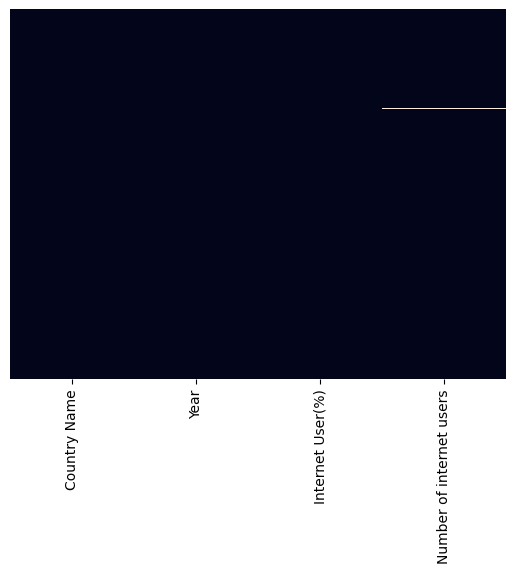

In [32]:
sns.heatmap(ampliacion_data.isnull(),cbar=False,cmap='rocket', yticklabels=False)

# Dataset previo: eliminamos los años del 2015 en adelante

In [33]:
previous_data=pd.read_csv('internet_countries_TS.csv')#abrimos el dataset final obtenido en nuestro Notebook 2 del proyecto final

In [34]:
previous_data.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0,0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN,0
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN,0
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN,0
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN,0


In [35]:
spain=previous_data[previous_data['Country Name']=='Spain']
spain_16=spain[spain['Year']==2016]
spain_16

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
4453,Spain,ESP,Europe,Southern Europe,2016,80.561333,Ingreso alto,30.262501,37338225.0,3


In [36]:
ampliacion_data[ampliacion_data['Country Name']=='Spain']#comprobamos que en 2016 los datos del datset de kaggle y los que hemos obetnido a lo largo de este notebook coinciden.

,Country Name,Year,Internet User(%),Number of internet users
301,Spain,2016,80.561333,3.744818e+07
302,Spain,2017,84.602246,3.941892e+07
303,Spain,2018,86.107236,4.029625e+07
304,Spain,2019,90.718665,4.276010e+07
305,Spain,2020,93.205649,4.414538e+07


In [37]:
previous_data.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0,0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN,0
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN,0
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN,0
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN,0


In [38]:
first_data=previous_data.copy()#hacemos una copia por seguridad

Del datset que teniamos y hemos llamado previous_data vamos a eliminar todos los datos del 2016 en adelante ya que no estaban completos, y estos datos ya los tenemos guardados en ampliacion_internetuser.csv

In [39]:
previous_data=previous_data.drop(previous_data[previous_data['Year']>=2016].index)

In [40]:
comprobacion=previous_data['Year'].value_counts()# comprobamos que tenemos los datos hasta el 2015
px.bar(x=comprobacion.index, y=comprobacion,title='Columna Year',color_continuous_scale="tealgrn",color_discrete_sequence=px.colors.sequential.Tealgrn_r)

# Union de los datasets 1990 A 2015 y 2016 A 2021

Antes de realizar la unión de los df 1990-2015 y df 2016-2021, a este segundo dataset le juntamos el dataset geography para la clasificación de los países en regiones y subregiones

In [41]:
df_geo=pd.read_csv('geography.csv')

Modificamos el nombre de algunos países para que sean coincidentes en todos nuestros datasets

In [42]:
df_geo['Country Name'].replace(to_replace=['United States of America'], value=['United States'],inplace=True)
df_geo['Country Name'].replace(to_replace=['Russian Federation'], value=['Russia'],inplace=True)

In [43]:
ampliacion_data['Country Name'].replace(to_replace=['Russian Federation'], value=['Russia'],inplace=True)

In [44]:
ampliacion_data.columns

Index(['Country Name', 'Year', 'Internet User(%)', 'Number of internet users'], dtype='object')

In [45]:
df_geo.columns

Index(['Region Name', 'Sub-region Name', 'Country Name', 'ISO3 Code',
       'Grupo de Ingresos del Banco Mundial '],
      dtype='object')

In [46]:
nuevo_ampliacion=pd.merge(ampliacion_data, df_geo,how='left' )
nuevo_ampliacion.head()

,Country Name,Year,Internet User(%),Number of internet users,Region Name,Sub-region Name,ISO3 Code,Grupo de Ingresos del Banco Mundial
0,Aruba,2016,93.542454,9.809329e+04,Americas,Latin America and the Caribbean,ABW,Ingreso alto
1,Aruba,2017,97.170000,1.023793e+05,Americas,Latin America and the Caribbean,ABW,Ingreso alto
2,Africa Eastern and Southern,2016,15.894355,9.695222e+07,NaN,NaN,NaN,NaN
3,Africa Eastern and Southern,2017,18.240060,1.142544e+08,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,2018,21.700695,1.395550e+08,NaN,NaN,NaN,NaN


Ordeamos las columnas para que sean igual que en el dataset previous_data

In [47]:
nuevo_ampliacion.columns

Index(['Country Name', 'Year', 'Internet User(%)', 'Number of internet users',
       'Region Name', 'Sub-region Name', 'ISO3 Code',
       'Grupo de Ingresos del Banco Mundial '],
      dtype='object')

In [48]:
previous_data.columns

Index(['Country Name', 'ISO3 Code', 'Region Name', 'Sub-region Name', 'Year',
       'Internet users (%)', 'Grupo de Ingresos',
       'Fixed broadband subscriptions (per 100 people)',
       'Number of internet users', 'Nivel Ingresos'],
      dtype='object')

In [49]:
previous_data.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0,0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN,0
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN,0
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN,0
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN,0


In [50]:
nuevo_ampliacion2=nuevo_ampliacion[['Country Name', 'ISO3 Code', 'Region Name', 'Sub-region Name', 'Year','Internet User(%)', 'Grupo de Ingresos del Banco Mundial ','Number of internet users']]

In [51]:
nuevo_ampliacion2.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet User(%),Grupo de Ingresos del Banco Mundial,Number of internet users
0,Aruba,ABW,Americas,Latin America and the Caribbean,2016,93.542454,Ingreso alto,9.809329e+04
1,Aruba,ABW,Americas,Latin America and the Caribbean,2017,97.170000,Ingreso alto,1.023793e+05
2,Africa Eastern and Southern,NaN,NaN,NaN,2016,15.894355,NaN,9.695222e+07
3,Africa Eastern and Southern,NaN,NaN,NaN,2017,18.240060,NaN,1.142544e+08
4,Africa Eastern and Southern,NaN,NaN,NaN,2018,21.700695,NaN,1.395550e+08


Modificamos el nombre de las columnas para que coincida con previous_data

In [52]:
nuevo_ampliacion2.rename(columns = {'Internet User(%)':'Internet users (%)'}, inplace = True)

In [53]:
nuevo_ampliacion2.rename(columns = {'Grupo de Ingresos del Banco Mundial ':'Grupo de Ingresos'}, inplace = True)

In [54]:
nuevo_ampliacion2.columns

Index(['Country Name', 'ISO3 Code', 'Region Name', 'Sub-region Name', 'Year',
       'Internet users (%)', 'Grupo de Ingresos', 'Number of internet users'],
      dtype='object')

In [55]:
previous_data.columns

Index(['Country Name', 'ISO3 Code', 'Region Name', 'Sub-region Name', 'Year',
       'Internet users (%)', 'Grupo de Ingresos',
       'Fixed broadband subscriptions (per 100 people)',
       'Number of internet users', 'Nivel Ingresos'],
      dtype='object')

In [56]:
nuevo_ampliacion2.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Number of internet users
0,Aruba,ABW,Americas,Latin America and the Caribbean,2016,93.542454,Ingreso alto,9.809329e+04
1,Aruba,ABW,Americas,Latin America and the Caribbean,2017,97.170000,Ingreso alto,1.023793e+05
2,Africa Eastern and Southern,NaN,NaN,NaN,2016,15.894355,NaN,9.695222e+07
3,Africa Eastern and Southern,NaN,NaN,NaN,2017,18.240060,NaN,1.142544e+08
4,Africa Eastern and Southern,NaN,NaN,NaN,2018,21.700695,NaN,1.395550e+08


In [57]:
nuevo_ampliacion2['Nivel Ingresos'] = nuevo_ampliacion2['Grupo de Ingresos']
grupo_ingreso=['Ingreso bajo','Ingreso mediano bajo','Ingreso mediano alto','Ingreso alto']
nivel_ingreso=[0,1,2,3]
nuevo_ampliacion2['Nivel Ingresos'].replace(grupo_ingreso,nivel_ingreso,inplace=True)
nuevo_ampliacion2.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Number of internet users,Nivel Ingresos
0,Aruba,ABW,Americas,Latin America and the Caribbean,2016,93.542454,Ingreso alto,9.809329e+04,3.0
1,Aruba,ABW,Americas,Latin America and the Caribbean,2017,97.170000,Ingreso alto,1.023793e+05,3.0
2,Africa Eastern and Southern,NaN,NaN,NaN,2016,15.894355,NaN,9.695222e+07,NaN
3,Africa Eastern and Southern,NaN,NaN,NaN,2017,18.240060,NaN,1.142544e+08,NaN
4,Africa Eastern and Southern,NaN,NaN,NaN,2018,21.700695,NaN,1.395550e+08,NaN


Eliminamos las filas que en ISO3 Code su valor sea nulo

In [58]:
nuevo_ampliacion2[nuevo_ampliacion2['ISO3 Code'].isna()]

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Number of internet users,Nivel Ingresos
2,Africa Eastern and Southern,NaN,NaN,NaN,2016,15.894355,NaN,9.695222e+07,NaN
3,Africa Eastern and Southern,NaN,NaN,NaN,2017,18.240060,NaN,1.142544e+08,NaN
4,Africa Eastern and Southern,NaN,NaN,NaN,2018,21.700695,NaN,1.395550e+08,NaN
5,Africa Eastern and Southern,NaN,NaN,NaN,2019,24.304658,NaN,1.604220e+08,NaN
6,Africa Eastern and Southern,NaN,NaN,NaN,2020,27.350308,NaN,1.852281e+08,NaN
...,...,...,...,...,...,...,...,...,...
1091,World,NaN,NaN,NaN,2020,59.940247,NaN,4.653720e+09,NaN
1094,Kosovo,NaN,NaN,NaN,2017,83.893597,NaN,1.502537e+06,NaN
1095,Kosovo,NaN,NaN,NaN,2018,89.443032,NaN,1.607367e+06,NaN
1096,"Yemen, Rep.",NaN,NaN,NaN,2016,24.579208,NaN,6.677731e+06,NaN


In [59]:
drop_filas=nuevo_ampliacion2[nuevo_ampliacion2['ISO3 Code'].isna()]
nuevo_ampliacion3=nuevo_ampliacion2.drop(drop_filas.index, axis=0)

<AxesSubplot: >

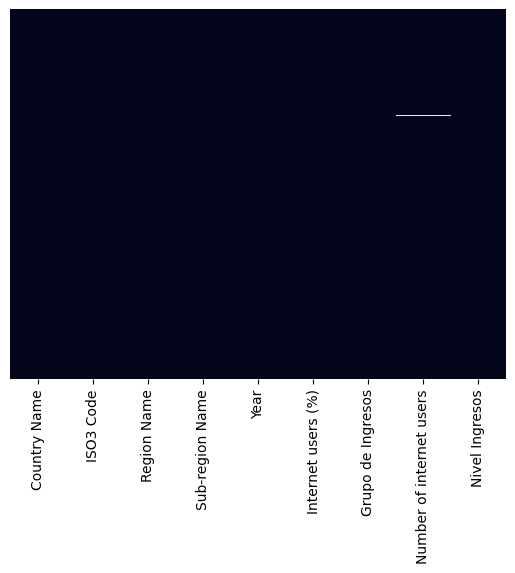

In [60]:
sns.heatmap(nuevo_ampliacion3.isnull(),cbar=False,cmap='rocket', yticklabels=False)

In [61]:
previous_data.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,Ingreso bajo,NaN,0.0,0
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,Ingreso bajo,NaN,NaN,0
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,Ingreso bajo,NaN,NaN,0
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,Ingreso bajo,NaN,NaN,0
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,Ingreso bajo,NaN,NaN,0


In [62]:
nuevo_previous=previous_data[['Country Name', 'ISO3 Code', 'Region Name', 'Sub-region Name', 'Year','Internet users (%)', 'Number of internet users','Grupo de Ingresos']]

In [63]:
nuevo_previous.head()#vamos a eliminar alguna de las columnas que de momento no usaremos en la primera parte de nuestro estudio sobre la evolución del numero de usuarios

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Number of internet users,Grupo de Ingresos
0,Afghanistan,AFG,Asia,Southern Asia,1990,0.0,0.0,Ingreso bajo
1,Afghanistan,AFG,Asia,Southern Asia,1991,0.0,NaN,Ingreso bajo
2,Afghanistan,AFG,Asia,Southern Asia,1992,0.0,NaN,Ingreso bajo
3,Afghanistan,AFG,Asia,Southern Asia,1993,0.0,NaN,Ingreso bajo
4,Afghanistan,AFG,Asia,Southern Asia,1994,0.0,NaN,Ingreso bajo


In [64]:
completo_df=pd.merge(nuevo_previous,nuevo_ampliacion3,how='outer')

In [65]:
completo_df[completo_df['Country Name']=='Spain']

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Number of internet users,Grupo de Ingresos,Nivel Ingresos
3996,Spain,ESP,Europe,Southern Europe,1990,0.012874,5.060000e+03,Ingreso alto,NaN
3997,Spain,ESP,Europe,Southern Europe,1991,0.025686,1.012100e+04,Ingreso alto,NaN
3998,Spain,ESP,Europe,Southern Europe,1992,0.076845,3.036600e+04,Ingreso alto,NaN
3999,Spain,ESP,Europe,Southern Europe,1993,0.127690,5.061400e+04,Ingreso alto,NaN
4000,Spain,ESP,Europe,Southern Europe,1994,0.280070,1.113690e+05,Ingreso alto,NaN
4001,Spain,ESP,Europe,Southern Europe,1995,0.380801,1.519030e+05,Ingreso alto,NaN
4002,Spain,ESP,Europe,Southern Europe,1996,1.331847,5.328630e+05,Ingreso alto,NaN
4003,Spain,ESP,Europe,Southern Europe,1997,2.803320,1.125016e+06,Ingreso alto,NaN
4004,Spain,ESP,Europe,Southern Europe,1998,4.361892,1.757522e+06,Ingreso alto,NaN
4005,Spain,ESP,Europe,Southern Europe,1999,7.085040,2.872255e+06,Ingreso alto,NaN


In [66]:
completo2_df=pd.merge(previous_data,nuevo_ampliacion3,how='outer')

In [67]:
completo2_df[completo2_df['Country Name']=='Spain']

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
3996,Spain,ESP,Europe,Southern Europe,1990,0.012874,Ingreso alto,NaN,5.060000e+03,3.0
3997,Spain,ESP,Europe,Southern Europe,1991,0.025686,Ingreso alto,NaN,1.012100e+04,3.0
3998,Spain,ESP,Europe,Southern Europe,1992,0.076845,Ingreso alto,NaN,3.036600e+04,3.0
3999,Spain,ESP,Europe,Southern Europe,1993,0.127690,Ingreso alto,NaN,5.061400e+04,3.0
4000,Spain,ESP,Europe,Southern Europe,1994,0.280070,Ingreso alto,NaN,1.113690e+05,3.0
4001,Spain,ESP,Europe,Southern Europe,1995,0.380801,Ingreso alto,NaN,1.519030e+05,3.0
4002,Spain,ESP,Europe,Southern Europe,1996,1.331847,Ingreso alto,NaN,5.328630e+05,3.0
4003,Spain,ESP,Europe,Southern Europe,1997,2.803320,Ingreso alto,NaN,1.125016e+06,3.0
4004,Spain,ESP,Europe,Southern Europe,1998,4.361892,Ingreso alto,NaN,1.757522e+06,3.0
4005,Spain,ESP,Europe,Southern Europe,1999,7.085040,Ingreso alto,NaN,2.872255e+06,3.0


Guardamos en nuevo CSV para nuestro analisis

In [68]:
completo2_df.to_csv('final_countries_TS.csv',index=False)#dataset que vamos autilizar en el siguiente Notebook EDA INTERNET FINAL

In [69]:
completo2_df.duplicated().sum()

0

# Arreglar datos Oceania

En el análisis de Power BI hemos visto que faltan los datos de Australia entre los años 2002 y 2004. Australia tiene un peso significativo en la región de Oceanía. Vamos a comprobarlo y arreglaro utilizando linspace

In [70]:
df_countries=pd.read_csv('internet_countries_TS.csv')
oceania=df_countries[df_countries['Region Name']=='Oceania']
oceania

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
80,American Samoa,ASM,Oceania,Polynesia,1990,0.000000,Ingreso mediano alto,NaN,NaN,2
81,American Samoa,ASM,Oceania,Polynesia,1991,0.000000,Ingreso mediano alto,NaN,NaN,2
82,American Samoa,ASM,Oceania,Polynesia,1992,0.000000,Ingreso mediano alto,NaN,NaN,2
83,American Samoa,ASM,Oceania,Polynesia,1993,0.000000,Ingreso mediano alto,NaN,NaN,2
84,American Samoa,ASM,Oceania,Polynesia,1994,0.000000,Ingreso mediano alto,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
5040,Vanuatu,VUT,Oceania,Melanesia,2013,11.300000,Ingreso mediano bajo,0.120794,28605.0,1
5041,Vanuatu,VUT,Oceania,Melanesia,2014,18.800000,Ingreso mediano bajo,1.731416,48664.0,1
5042,Vanuatu,VUT,Oceania,Melanesia,2015,22.351405,Ingreso mediano bajo,1.584849,59142.0,1
5043,Vanuatu,VUT,Oceania,Melanesia,2016,24.000000,Ingreso mediano bajo,1.575827,64896.0,1


In [71]:
oceania['Sub-region Name'].unique()

array(['Polynesia', 'Australia and New Zealand', 'Melanesia',
       'Micronesia'], dtype=object)

Faltan los años 2002 2003 y 2004. Comprabos si tenemos el datos de esos años para cada una de la sub regiones de Oceania.

In [72]:
Australia=oceania[oceania['Sub-region Name']=='Australia and New Zealand']# faltan datos
Australia.head(23)

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
251,Australia,AUS,Oceania,Australia and New Zealand,1990,0.585095,Ingreso alto,NaN,99709.0,3
252,Australia,AUS,Oceania,Australia and New Zealand,1991,1.097204,Ingreso alto,NaN,189508.0,3
253,Australia,AUS,Oceania,Australia and New Zealand,1992,1.768765,Ingreso alto,NaN,309285.0,3
254,Australia,AUS,Oceania,Australia and New Zealand,1993,1.974611,Ingreso alto,NaN,349259.0,3
255,Australia,AUS,Oceania,Australia and New Zealand,1994,2.232101,Ingreso alto,NaN,399161.0,3
256,Australia,AUS,Oceania,Australia and New Zealand,1995,2.759655,Ingreso alto,NaN,498856.0,3
257,Australia,AUS,Oceania,Australia and New Zealand,1996,3.275250,Ingreso alto,NaN,598443.0,3
258,Australia,AUS,Oceania,Australia and New Zealand,1997,16.369358,Ingreso alto,NaN,3023026.0,3
259,Australia,AUS,Oceania,Australia and New Zealand,1998,30.813239,Ingreso alto,NaN,5751305.0,3
260,Australia,AUS,Oceania,Australia and New Zealand,1999,40.783784,Ingreso alto,NaN,7693499.0,3


In [73]:
Aust=oceania[oceania['Country Name']=='Australia']# faltan datos
Aust.head()

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
251,Australia,AUS,Oceania,Australia and New Zealand,1990,0.585095,Ingreso alto,NaN,99709.0,3
252,Australia,AUS,Oceania,Australia and New Zealand,1991,1.097204,Ingreso alto,NaN,189508.0,3
253,Australia,AUS,Oceania,Australia and New Zealand,1992,1.768765,Ingreso alto,NaN,309285.0,3
254,Australia,AUS,Oceania,Australia and New Zealand,1993,1.974611,Ingreso alto,NaN,349259.0,3
255,Australia,AUS,Oceania,Australia and New Zealand,1994,2.232101,Ingreso alto,NaN,399161.0,3


Calculamos los valores de 2002,2003 y 2005

In [74]:
yr_2001=Aust[Aust['Year']==2001]#obtenemos el valor del 2001
yr_2001

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
262,Australia,AUS,Oceania,Australia and New Zealand,2001,52.689266,Ingreso alto,0.639761,10152449.0,3


In [75]:
yr_2005=Aust[Aust['Year']==2005]#obtenemos el valor del 2005
yr_2005

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
263,Australia,AUS,Oceania,Australia and New Zealand,2005,63.0,Ingreso alto,9.990812,12750509.0,3


In [76]:
yr_nuevo=np.linspace((yr_2001['Number of internet users']), (yr_2005['Number of internet users']), 3) #calculamos los valores intermedios para los años que nos faltan
yr_nuevo

array([[10152449.],
       [11451479.],
       [12750509.]])

Creamos las nuevas filas de Australia para los años 2002,2003.2004

In [77]:
nueva_fila_2002={'Country Name':'Australia',
                    'ISO3 Code':'AUS',
                    'Region Name':'Oceania',
                    'Sub-region Name':'Australia and New Zealand',
                    'Year':2002,
                    'Internet users (%)':np.NaN,
                    'Grupo de Ingresos':'Ingreso alto',
                    'Fixed broadband subscriptions (per 100 people)':np.NaN,
                    'Number of internet users':10152449,
                    'Nivel Ingresos':3,
                }

In [78]:
nueva_fila_2003={'Country Name':'Australia',
                    'ISO3 Code':'AUS',
                    'Region Name':'Oceania',
                    'Sub-region Name':'Australia and New Zealand',
                    'Year':2003,
                    'Internet users (%)':np.NaN,
                    'Grupo de Ingresos':'Ingreso alto',
                    'Fixed broadband subscriptions (per 100 people)':np.NaN,
                    'Number of internet users':11451479,
                    'Nivel Ingresos':3,
                }

In [79]:
nueva_fila_2004={'Country Name':'Australia',
                    'ISO3 Code':'AUS',
                    'Region Name':'Oceania',
                    'Sub-region Name':'Australia and New Zealand',
                    'Year':2004,
                    'Internet users (%)':np.NaN,
                    'Grupo de Ingresos':'Ingreso alto',
                    'Fixed broadband subscriptions (per 100 people)':np.NaN,
                    'Number of internet users':12750509,
                    'Nivel Ingresos':3,
                }

In [80]:
lista_append=[nueva_fila_2004,nueva_fila_2003,nueva_fila_2002]

Añadimos las nuevas filas en el dataset

In [81]:
completo3_df=completo2_df.copy()

In [82]:
completo3_df=completo3_df.append(lista_append)

C:\Users\Jose Antonio\AppData\Local\Temp\ipykernel_3292\2016154327.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Comprobamos que se ha añadido la nueva columna

In [83]:
oceania_copy=completo3_df[completo3_df['Region Name']=='Oceania']
Aust_copy=oceania_copy[oceania_copy['Country Name']=='Australia']
yr_2002_copy=Aust_copy[Aust_copy['Year']==2002]
yr_2002_copy

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
2,Australia,AUS,Oceania,Australia and New Zealand,2002,NaN,Ingreso alto,NaN,10152449.0,3.0


In [84]:
yr_2003_copy=Aust_copy[Aust_copy['Year']==2003]
yr_2003_copy

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
1,Australia,AUS,Oceania,Australia and New Zealand,2003,NaN,Ingreso alto,NaN,11451479.0,3.0


In [85]:
yr_2004_copy=Aust_copy[Aust_copy['Year']==2004]
yr_2004_copy

,Country Name,ISO3 Code,Region Name,Sub-region Name,Year,Internet users (%),Grupo de Ingresos,Fixed broadband subscriptions (per 100 people),Number of internet users,Nivel Ingresos
0,Australia,AUS,Oceania,Australia and New Zealand,2004,NaN,Ingreso alto,NaN,12750509.0,3.0


In [86]:
completo3_df.to_csv('final_countries_completadooceania.csv',index=False)